Gravity
Drag

Thrust

Momentum

https://www.narom.no/undervisningsressurser/sarepta/rocket-theory/rocket-dynamics-2/4-1aerodynamics-and-forces-acting-on-the-rocket/

https://spaceflight101.com/ariane-5-va226/ariane-5-va226-launch-profile/

alpha = 0 (angle of attack)
delta = 0 (angle of thrust)
gamma = down (angle of gravitational pull)


Equations?

Crude
M dv/dt = T - Mg_0 r_0/r - D

dR/dt = V
dV/dt = 1/M (Tv - Mg_0 r_0/r k - Dv) # v = unit velocity vector, k = unit vector from earth to rocket
a = D V / D t # D = delta
D = q c_D A #  A is the frontal area of the rocket, q is the dynamic pressure and cD is the drag coefficient

V_0 = [0,0]
R_0 = [0,0]

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import rc
from object_classes import Rocket, Earth

rc('animation', html='jshtml')
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = [20, 18]

In [2]:
timestep = 0.1
duration = 2000
timespace = np.linspace(0,duration+1,int(duration/timestep))

In [3]:
cd = 0.1 # drag coefficient 
rho0 = 1.25 # sea level kg/m^3

ve = 11 * 10**3 # escape velocity in m/s

In [20]:
# Forward euler
rocket = Rocket(payload=0.5*10**3, fuelMassStage1=480*10**3, fuelMassStage2=170*10**3, fuelMassStage3=14.9*10**3)
earth = Earth()

for i in range(len(timespace[1:])):
    rho = rho0 * math.exp(-earth.g0 * 0.0289 * rocket.getPosition() / (8.314 * 270))

    D = 1/2 * rho * rocket.getVelocity()**2 * cd * rocket.area
    accel = 1/rocket.getTotalMass() * (rocket.getThrust() - rocket.getTotalMass()*earth.g0*(earth.radius/(rocket.getPosition()+earth.radius))**2 - D)
    rocket.usefuel(timestep)
    rocket.accelerations.append(accel)
    rocket.velocities.append(rocket.getVelocity() + accel*timestep)
    rocket.positions.append(rocket.getPosition() + rocket.getVelocity()*timestep)

    #print(rocket.getVelocity(), rocket.accelerations[-1], D, rho)
    #print(rocket.getTotalMass()*earth.g0*(earth.radius/(rocket.getPosition()+earth.radius))**2, rocket.getAcceleration())
    #print(rocket.fuelMassStage3 < 0 , abs(rocket.getAcceleration()) - 0.05 < 0 , rocket.getVelocity() > abs(rocket.getAcceleration() * 10))

    if rocket.getVelocity() > ve: #rocket.fuelMassStage3 < 0 and abs(rocket.getAcceleration()) - 0.05 < 0 and rocket.getVelocity() > abs(rocket.getAcceleration() * 10):
        timespace = timespace[:i+2]
        print("Escaped!")
        break


Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one


In [4]:
# Runge kutta
rocket = Rocket(payload=0.5*10**3, fuelMassStage1=480*10**3, fuelMassStage2=170*10**3, fuelMassStage3=14.9*10**3)
earth = Earth()

for i in range(len(timespace[1:])):
    rho = rho0 * math.exp(-earth.g0 * 0.0289 * rocket.getPosition() / (8.314 * 270))
    D = 1/2 * rho * rocket.getVelocity()**2 * cd * rocket.area

    accel1 = rocket.getAcceleration()
    
    accel2 = 1/rocket.getTotalMass() * (rocket.getThrust() - rocket.getTotalMass()*earth.g0*(earth.radius/(rocket.getPosition()+earth.radius))**2 - D)
    
    rocket.usefuel(timestep/2)
    accel3 = 1/rocket.getTotalMass() * (rocket.getThrust() - rocket.getTotalMass()*earth.g0*(earth.radius/(rocket.getPosition()+earth.radius))**2 - D)
    
    rocket.usefuel(timestep/2)
    accel4 = 1/rocket.getTotalMass() * (rocket.getThrust() - rocket.getTotalMass()*earth.g0*(earth.radius/(rocket.getPosition()+earth.radius))**2 - D)


    rocket.accelerations.append(accel4)
    rocket.velocities.append(rocket.getVelocity() + timestep*(accel1 + 2*accel2 + 2*accel3 + accel4)/6)
    rocket.positions.append(rocket.getPosition() + rocket.getVelocity()*timestep)

    #print(rocket.getVelocity(), rocket.accelerations[-1], D, rho)
    #print(rocket.getTotalMass()*earth.g0*(earth.radius/(rocket.getPosition()+earth.radius))**2, rocket.getAcceleration())
    #print(rocket.fuelMassStage3 < 0 , abs(rocket.getAcceleration()) - 0.05 < 0 , rocket.getVelocity() > abs(rocket.getAcceleration() * 10))

    if rocket.getVelocity() > ve: #rocket.fuelMassStage3 < 0 and abs(rocket.getAcceleration()) - 0.05 < 0 and rocket.getVelocity() > abs(rocket.getAcceleration() * 10):
        timespace = timespace[:i+2]
        print("Escaped!")
        break

Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one
Stage one


In [21]:
print(np.max(rocket.velocities))

10097.470390745262


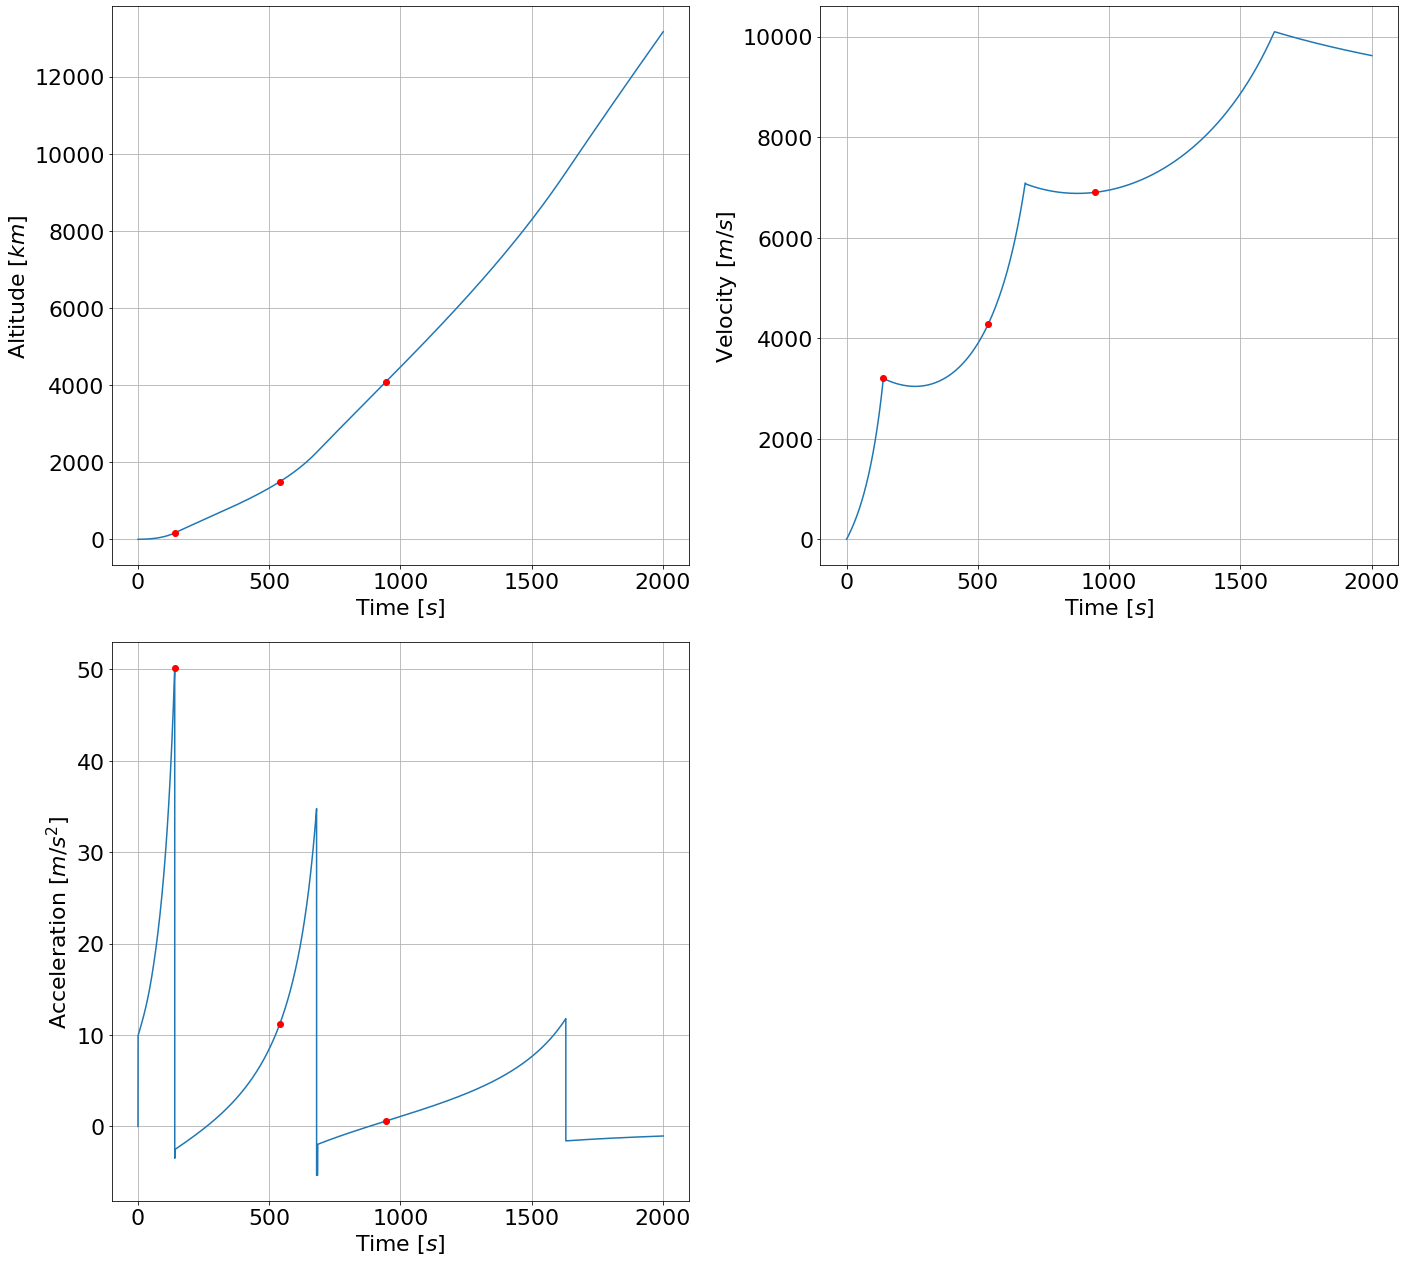

In [22]:
plt.grid()
plt.subplot(2,2,1)
plt.grid()
plt.ylabel("Altitude $[km]$")
plt.xlabel("Time $[s]$")
plt.plot(timespace, np.array(rocket.positions)*10**(-3))
plt.plot(rocket.burntimeStage1, rocket.positions[int(rocket.burntimeStage1/timestep)]*10**-3, 'ro')
plt.plot(rocket.burntimeStage2, rocket.positions[int(rocket.burntimeStage2/timestep)]*10**-3, 'ro')
plt.plot(rocket.burntimeStage3 + rocket.stage3Cooldown, rocket.positions[int((rocket.burntimeStage3 + rocket.stage3Cooldown)/timestep)]*10**-3, 'ro')
plt.tight_layout()  # adapt the plot area tot the text with larger fonts
plt.subplot(2,2,2)
plt.grid()
plt.ylabel("Velocity $[m/s]$")
plt.xlabel("Time $[s]$")
plt.plot(timespace, rocket.velocities)
plt.plot(rocket.burntimeStage1, rocket.velocities[int(rocket.burntimeStage1/timestep)], 'ro')
plt.plot(rocket.burntimeStage2, rocket.velocities[int(rocket.burntimeStage2/timestep)], 'ro')
plt.plot(rocket.burntimeStage3 + rocket.stage3Cooldown, rocket.velocities[int((rocket.burntimeStage3 + rocket.stage3Cooldown)/timestep)], 'ro')
plt.tight_layout()
plt.subplot(2,2,3)
plt.grid()
plt.ylabel("Acceleration $[m/s^2]$")
plt.xlabel("Time $[s]$")
plt.plot(timespace, rocket.accelerations)
plt.plot(rocket.burntimeStage1, rocket.accelerations[int(rocket.burntimeStage1/timestep)], 'ro')
plt.plot(rocket.burntimeStage2, rocket.accelerations[int(rocket.burntimeStage2/timestep)], 'ro')
plt.plot(rocket.burntimeStage3 + rocket.stage3Cooldown, rocket.accelerations[int((rocket.burntimeStage3 + rocket.stage3Cooldown)/timestep)], 'ro')
plt.tight_layout()

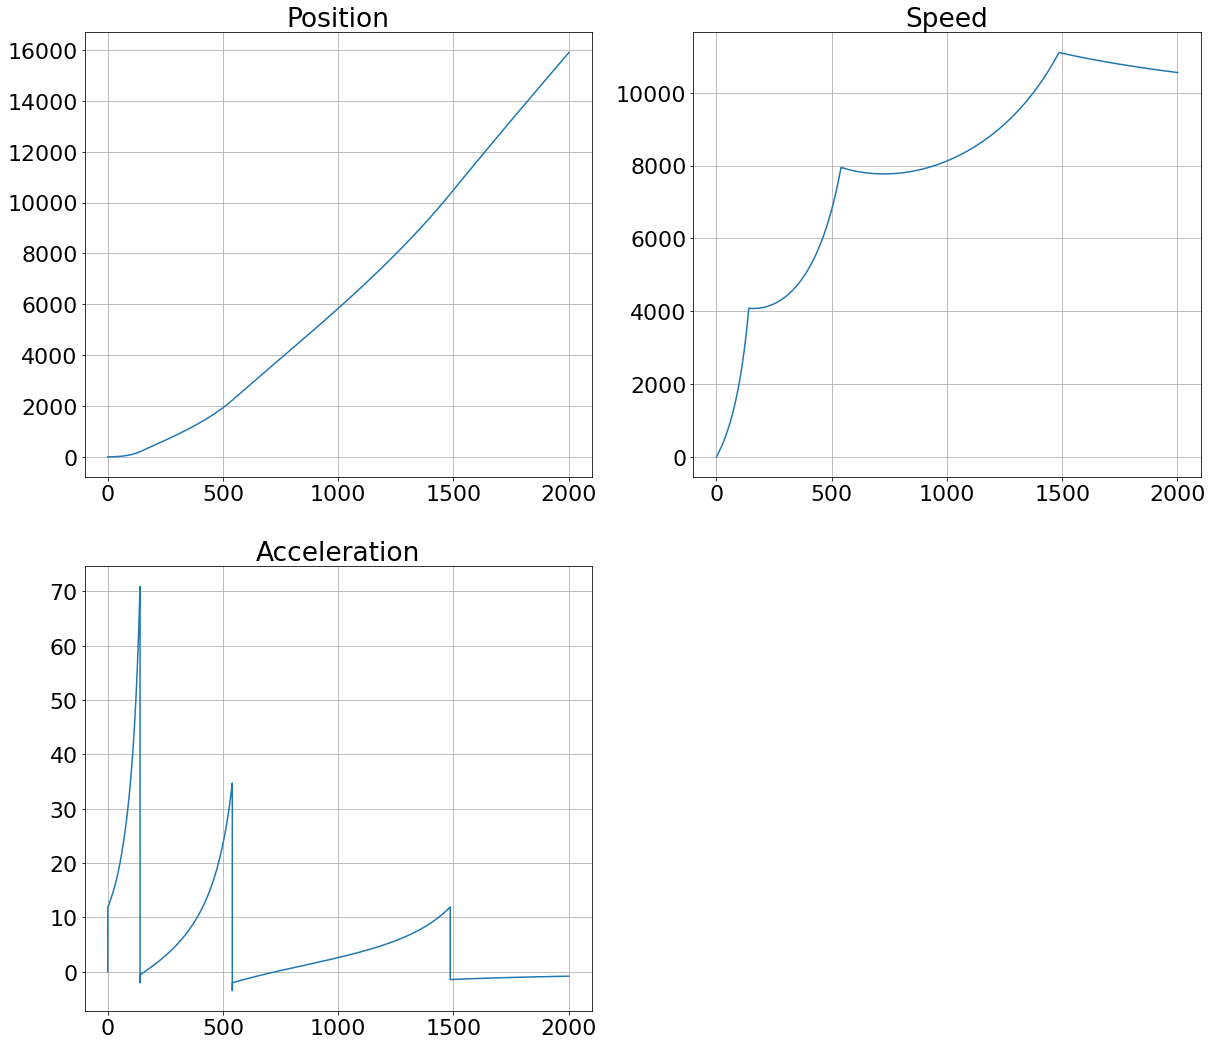

In [18]:
plt.grid()
plt.subplot(2,2,1)
plt.grid()
plt.title("Position")
plt.plot(timespace, np.array(rocket.positions)*10**-3)
plt.subplot(2,2,2)
plt.grid()
plt.title("Speed")
plt.plot(timespace, rocket.velocities)
plt.subplot(2,2,3)
plt.grid()
plt.title("Acceleration")
plt.plot(timespace, rocket.accelerations)